In [1]:
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from plotly.subplots import make_subplots
import plotly.graph_objects as go

plt.rcParams["figure.figsize"] = (20, 9)


In [2]:
# count nomber of frames where face is not detected
path = f"./Ashish_data/"
csvfiles = []
count = []
for x in os.listdir(path):
    if x.endswith(".csv"):
        csvfiles.append(x)
    # print(videofilename)
csvfiles.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
for x in csvfiles:
    df_alert = pd.read_csv(f"./Ashish_data/{x}")
    count.append((df_alert["NewEAR"] == 0).sum())
print(count)


[820, 0, 345, 526, 399, 219, 2, 5, 7, 20, 1211, 504, 8074, 802, 326, 1155, 3383, 3842, 383, 265, 798, 1820, 269, 195, 129, 648]


In [3]:
#perclose calculation logic
df_blink = pd.read_csv("./Ashish_data/5_EAR.csv")
df_blink_detection = pd.read_csv("./Blink_duration/5_Blink_Duration.csv")
answer = df_blink_detection["No_of_frames"].sum()/df_blink.shape[0]
print(df_blink.shape[0])
print(df_blink_detection["No_of_frames"].sum())
print(answer)


91897
55911
0.6084094148884077


In [132]:
#main logic for indivisual file blink detection and blink duration
number_of_blinks = []
blink_duration = pd.DataFrame(columns=["Start_blink", "End_blink", "Blink_frame", "No_of_frames"])
df_alert = pd.read_csv(f"./Ashish_data/1_EAR.csv")
missing_frame_details = df_alert.copy()
# remove rows where facemesh could not detect the face
df_alert = df_alert.loc[(df_alert["EAR"] != 0)]
df_alert = df_alert.reset_index()  # reindexing to identify the blink duration
# after reset_index(), one additional column is added which does not required
df_alert.drop(columns=["index"], axis=1, inplace=True)
df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()  # exponetial weighted average moving a
startframe = list()
endframe = list()
frame_no = []
for i in range(df_alert.shape[0]):
    if df_alert["NewEAR"].iloc[i] < df_alert["NewEAR"].iloc[i-4]*0.68 and i > 4 and (df_alert["FN"].iloc[i] - df_alert["FN"].iloc[i-1]) < 2 and df_alert["EAR"].iloc[i]<0.12:
            if len(frame_no) == 0 or (df_alert["FN"].iloc[i] - frame_no[-1] > 8):
                frame_no.append(df_alert["FN"].iloc[i])
            else:
                if (df_alert["NewEAR"].iloc[i] < df_alert["NewEAR"].iloc[i-1]):
                    frame_no[-1] = df_alert["FN"].iloc[i]
number_of_blinks.append(len(frame_no))
print(frame_no)
print(number_of_blinks)
# file = df_alert.to_csv("Test.csv")


[31, 89, 154, 203, 351, 481, 625, 776, 820, 929, 1070, 1171, 1296, 1337, 1357, 1372, 1546, 2431, 2574, 2646, 2865, 2931, 3067, 3870, 4002, 4123, 4532, 5043, 5180, 5254, 5290, 5327, 5406, 5483, 5581, 5608, 5748, 5767, 5891, 6489, 6570, 6635, 6712, 6793, 7188, 7249, 7260, 8005, 8232, 8547, 8613, 8680, 8726, 8779, 8885, 9048, 9184, 9198, 9248, 9271, 9375, 9491, 9563, 9630, 9647, 9664, 9748, 9770, 9884, 9919, 9928, 10020, 10038, 10281, 10321, 10383, 10505, 10520, 10681, 10743, 10873, 10977, 10995, 11118, 11240, 11411, 11468, 11570, 11625, 11793, 11964, 12088, 12101, 12189, 12283, 12338, 12387, 12573, 12594, 12654, 12702, 12750, 12800, 12814, 12865, 12908, 12950, 13036, 13053, 13099, 13144, 13177, 13280, 13348, 13413, 13479, 13577, 13591, 13666, 13708, 13757, 13790, 13814, 13866, 13914, 13942, 13963, 14025, 14046, 14097, 14123, 14155, 14200, 14266, 14430, 14494, 14548, 14624, 14692, 14703, 14786, 14815, 14846, 14869, 14926, 14972, 14988, 15078, 15115, 15161, 15203, 15243, 15286, 15324, 1537

[33, 91, 157, 205, 353, 483, 531, 626, 663, 702, 1072, 1173, 1299, 1339, 1358, 1376, 1547, 2254, 2434, 2622, 2647, 2935, 3070, 3101, 3873, 3933, 4003, 4125, 4536, 4636, 5046, 5185, 5255, 5293, 5333, 5409, 5485, 5585, 5610, 5752, 5768, 6492, 6573, 6637, 6715, 6793, 7188, 7251, 7264, 7806, 8006, 8035, 8233, 8550, 8600, 8614, 8663, 8681, 8732, 8781, 8885, 8950, 9051, 9201, 9273, 9359, 9377, 9565, 9666, 9749, 9773, 10020, 10040, 10283, 10322, 10384, 10507, 10522, 10682, 10747, 10879, 10996, 11119, 11242, 11413, 11445, 11470, 11627, 11794, 11967, 12089, 12283, 12339, 12388, 12477, 12574, 12596, 12655, 12704, 12752, 12803, 12816, 12868, 12910, 12951, 13055, 13100, 13145, 13178, 13281, 13349, 13415, 13480, 13578, 13595, 13670, 13714, 13759, 13791, 13818, 13869, 13918, 13965, 14027, 14050, 14100, 14124, 14157, 14201, 14268, 14343, 14431, 14496, 14551, 14626, 14694, 14703, 14823, 14869, 14928, 14974, 14989, 15079, 15116, 15164, 15205, 15246, 15287, 15326, 15375, 15411, 15433, 15500, 15564, 15647, 15773, 15875, 15954, 15998, 16072, 16110, 16171, 16209]


[31, 89, 154, 203, 351, 481, 525, 594, 625, 662, 702, 776, 820, 929, 1070, 1171, 1296, 1337, 1357, 1372, 1546, 2431, 2574, 2646, 2865, 2931, 3067, 3870, 4002, 4123, 4534, 4634, 5043, 5180, 5254, 5290, 5327, 5406, 5483, 5509, 5581, 5608, 5748, 5767, 5891, 6489, 6570, 6635, 6712, 6787, 7188, 7249, 7260, 8005, 8232, 8547, 8596, 8613, 8659, 8680, 8729, 8779, 8885, 8949, 9048, 9184, 9198, 9248, 9271, 9358, 9375, 9491, 9563, 9630, 9647, 9664, 9748, 9770, 9884, 9919, 9928, 10020, 10038, 10281, 10321, 10383, 10505, 10520, 10681, 10743, 10873, 10977, 10995, 11118, 11240, 11411, 11468, 11570, 11625, 11793, 11964, 12088, 12101, 12189, 12283, 12338, 12387, 12476, 12497, 12530, 12573, 12594, 12654, 12702, 12750, 12800, 12814, 12865, 12908, 12950, 13036, 13053, 13099, 13144, 13177, 13280, 13307, 13348, 13365, 13413, 13479, 13577, 13591, 13666, 13708, 13757, 13790, 13814, 13866, 13914, 13942, 13963, 14025, 14046, 14097, 14123, 14155, 14200, 14266, 14343, 14430, 14494, 14548, 14624, 14692, 14703, 14786, 14815, 14846, 14869, 14926, 14972, 14988, 15078, 15115, 15161, 15203, 15243, 15286, 15324, 15373, 15408, 15431, 15499, 15562, 15646, 15723, 15773, 15873, 15953, 15995, 16009, 16071, 16108, 16169, 16207]

In [52]:
# Per minute information luke blink, duration and missing frame.
blinks_per_minutes = []
missing_frames_per_minutes = []
blinks_per_30_sec = []
No_of_frame = 1800
count = 0
count1 = 0
missing_frame_count = 0
increase = 1800
for x in frame_no:
    # start_b = data_blink["Start_blink"].loc[x]
    if (x < No_of_frame):
        count = count+1
    else:
        # print(count)
        blinks_per_minutes.append(count)
        No_of_frame = No_of_frame+increase
        count = 0

No_of_frame = 900
increase = 900
for i in range(missing_frame_details.shape[0]):
    # print(No_of_frame)
    if (x < No_of_frame):
        count1 = count1+1
    else:
        # print(count)
        blinks_per_30_sec.append(count)
        No_of_frame = No_of_frame+increase
        count1 = 0


        
No_of_frame = 1800
increase = 1800
for i in range(missing_frame_details.shape[0]):
    # print(No_of_frame)
    if (i<No_of_frame):
        if(missing_frame_details["NewEAR"].iloc[i]==0):
            missing_frame_count = missing_frame_count+1
    else:
        # print(missing_frame_count)
        missing_frames_per_minutes.append(missing_frame_count)
        No_of_frame = No_of_frame+increase
        missing_frame_count = 0


print(blinks_per_minutes)
print(sum(missing_frames_per_minutes))

pd.set_option('display.max_rows', None)
print(sum(blinks_per_minutes)/(len(blinks_per_minutes)-1))


[17, 6, 10, 11, 14, 17, 16, 33, 30]
820
19.25


In [53]:
#blink duration from the file
blink_duration_old_logic = pd.read_csv("./Blink_duration/1_Blink_Duration.csv")
no_of_frame = 1800
increasement = 1800
minute_blink = []
Perclose_per_minute = []
average_duration_blink = []
for i in range(blink_duration_old_logic.shape[0]):
    # print(i)
    if blink_duration_old_logic["Blink_frame"].iloc[i] < no_of_frame:
        minute_blink.append(blink_duration_old_logic["No_of_frames"].iloc[i])
    else:
        average_duration_blink.append(sum(minute_blink)/len(minute_blink))
        Perclose_per_minute.append((sum(minute_blink))/1800)
        minute_blink.clear()
        minute_blink.append(blink_duration_old_logic["No_of_frames"].iloc[i])
        no_of_frame = no_of_frame+increase
print(average_duration_blink)
print(Perclose_per_minute)


[32.94117647058823, 14.428571428571429, 48.72727272727273, 14.5, 11.333333333333334, 6.055555555555555, 11.176470588235293, 9.529411764705882, 4.580645161290323]
[0.3111111111111111, 0.05611111111111111, 0.29777777777777775, 0.09666666666666666, 0.09444444444444444, 0.06055555555555556, 0.10555555555555556, 0.18, 0.07888888888888888]


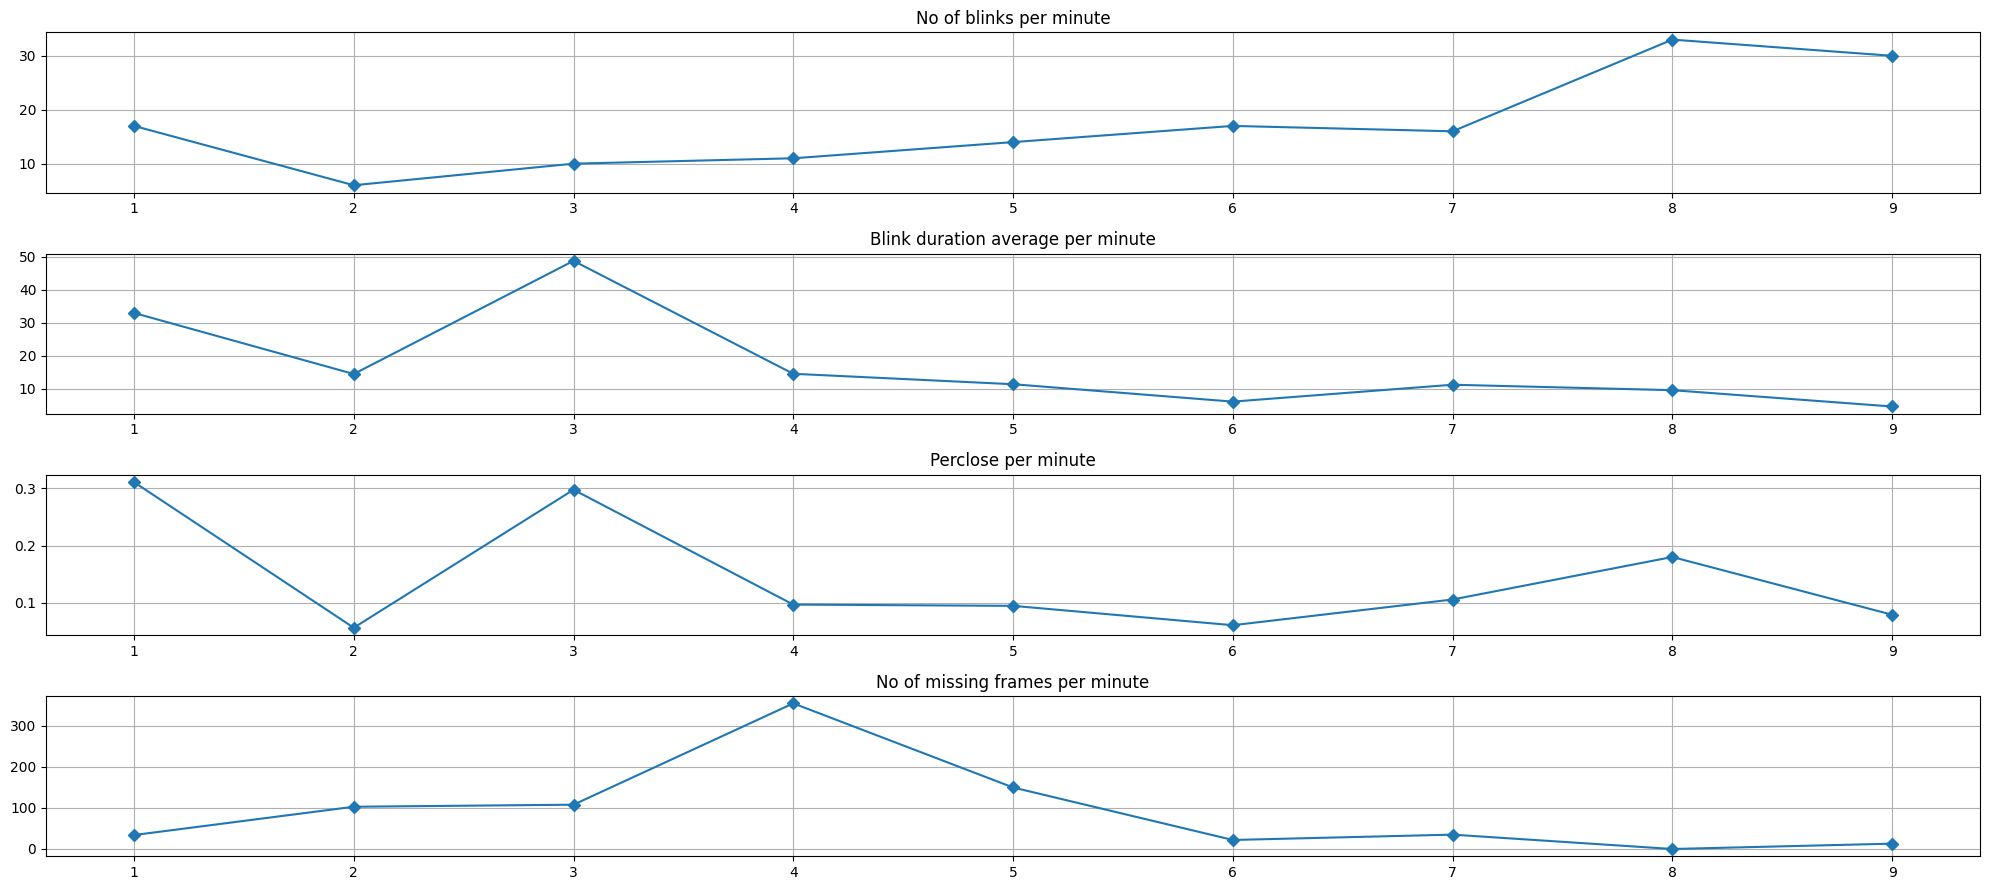

In [55]:
#graph ploting
minutes = range(1,len(blinks_per_minutes)+1)
two_minutes = [x for x in minutes if x % 2 == 0]
five_minutes = [x for x in minutes if x % 5 == 0]
# print(tow_minutes)
# print(len(blinks_per_two_minutes))
plt.subplot(4,1,1)
plt.plot(minutes,blinks_per_minutes, marker="D")
# plt.plot(minutes,np.mean(np.array(blinked_frame)))
plt.title("No of blinks per minute")
plt.grid()

plt.subplot(4,1,2)
plt.plot(minutes,average_duration_blink,marker="D")
plt.title("Blink duration average per minute")
plt.grid()

plt.subplot(4,1,3)
plt.plot(minutes,Perclose_per_minute,marker="D")
plt.title("Perclose per minute")
plt.grid()

plt.subplot(4,1,4)
plt.plot(minutes,missing_frames_per_minutes, marker="D")
plt.title("No of missing frames per minute")
plt.grid()

plt.tight_layout()
plt.show()




In [39]:
pd.set_option('display.max_rows', None)


#### 2nd File

In [59]:
#main logic for indivisual file blink detection and blink duration
number_of_blinks = []
blink_duration = pd.DataFrame(columns=["Start_blink", "End_blink", "Blink_frame", "No_of_frames"])
df_alert = pd.read_csv(f"./Ashish_data/2_EAR.csv")
missing_frame_details = df_alert.copy()
# remove rows where facemesh could not detect the face
df_alert = df_alert.loc[(df_alert["EAR"] != 0)]
df_alert = df_alert.reset_index()  # reindexing to identify the blink duration
# after reset_index(), one additional column is added which does not required
df_alert.drop(columns=["index"], axis=1, inplace=True)
df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()  # exponetial weighted average moving a
startframe = list()
endframe = list()
frame_no = []
for i in range(df_alert.shape[0]):
    if df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-4]*0.85 and i > 4 and (df_alert["FN"].iloc[i] - df_alert["FN"].iloc[i-1]) < 2 and df_alert["EAR"].iloc[i]<0.14:
            if len(frame_no) == 0 or (df_alert["FN"].iloc[i] - frame_no[-1] > 8):
                frame_no.append(df_alert["FN"].iloc[i])
            else:
                if (df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-1]):
                    frame_no[-1] = df_alert["FN"].iloc[i]
number_of_blinks.append(len(frame_no))
print(frame_no)


print(number_of_blinks)
# file = df_alert.to_csv("Test.csv")


[8, 83, 95, 123, 145, 163, 211, 251, 264, 379, 403, 505, 574, 621, 836, 861, 931, 1028, 1184, 1275, 1285, 1474, 1515, 1684, 1730, 1828, 1903, 1973, 2039, 2081, 2144, 2183, 2231, 2278, 2310, 2397, 2451, 2603, 2706, 2768, 2785, 2854, 2878, 2909, 2970, 3026, 3102, 3167, 3266, 3295, 3363, 3447, 3502, 3637, 3682, 3762, 3848, 3906, 4009, 4066, 4151, 4261, 4309, 4420, 4439, 4531, 4583, 4651, 4678, 4881, 4960, 4989, 5008, 5040, 5130, 5205, 5253, 5299, 5397, 5613, 5668, 5712, 5732, 5789, 5919, 6162, 6203, 6216, 6244, 6399, 6411, 6450, 6535, 6580, 6658, 6711, 6768, 6803, 6889, 7016, 7073, 7129, 7164, 7180, 7231, 7340, 7394, 7463, 7508, 7541, 7554, 7594, 7673, 7684, 7755, 7793, 7844, 7896, 7948, 7991, 8056, 8067, 8100, 8116, 8137, 8178, 8223, 8339, 8407, 8441, 8454, 8504, 8565, 8585, 8693, 8749, 8828, 8858, 8973]
[139]


In [60]:
# Per minute information luke blink, duration and missing frame.
blinks_per_minutes = []
missing_frames_per_minutes = []
blinks_per_two_minutes = []
blinks_per_five_minutes = []
No_of_frame = 1800
count = 0
missing_frame_count = 0
increase = 1800
for x in frame_no:
    # start_b = data_blink["Start_blink"].loc[x]
    if (x < No_of_frame):
        count = count+1
    else:
        # print(count)
        blinks_per_minutes.append(count)
        No_of_frame = No_of_frame+increase
        count = 0

No_of_frame = 1800
increase = 1800
for i in range(missing_frame_details.shape[0]):
    # print(No_of_frame)
    if (i<No_of_frame):
        if(missing_frame_details["NewEAR"].iloc[i]==0):
            missing_frame_count = missing_frame_count+1
    else:
        # print(missing_frame_count)
        missing_frames_per_minutes.append(missing_frame_count)
        No_of_frame = No_of_frame+increase
        missing_frame_count = 0


print(blinks_per_minutes)
print(sum(missing_frames_per_minutes))

pd.set_option('display.max_rows', None)
print(sum(blinks_per_minutes)/(len(blinks_per_minutes)-1))


[25, 27, 25, 24]
0
33.666666666666664


In [61]:
#blink duration from the file
blink_duration_old_logic = pd.read_csv("./Blink_duration/2_Blink_Duration.csv")
no_of_frame = 1800
increasement = 1800
minute_blink = []
Perclose_per_minute = []
average_duration_blink = []
for i in range(blink_duration_old_logic.shape[0]):
    # print(i)
    if blink_duration_old_logic["Blink_frame"].iloc[i] < no_of_frame:
        minute_blink.append(blink_duration_old_logic["No_of_frames"].iloc[i])
    else:
        average_duration_blink.append(sum(minute_blink)/len(minute_blink))
        Perclose_per_minute.append((sum(minute_blink))/1800)
        minute_blink.clear()
        minute_blink.append(blink_duration_old_logic["No_of_frames"].iloc[i])
        no_of_frame = no_of_frame+increase
print(average_duration_blink)
print(Perclose_per_minute)


[5.76, 7.035714285714286, 9.307692307692308, 8.12]
[0.08, 0.10944444444444444, 0.13444444444444445, 0.11277777777777778]


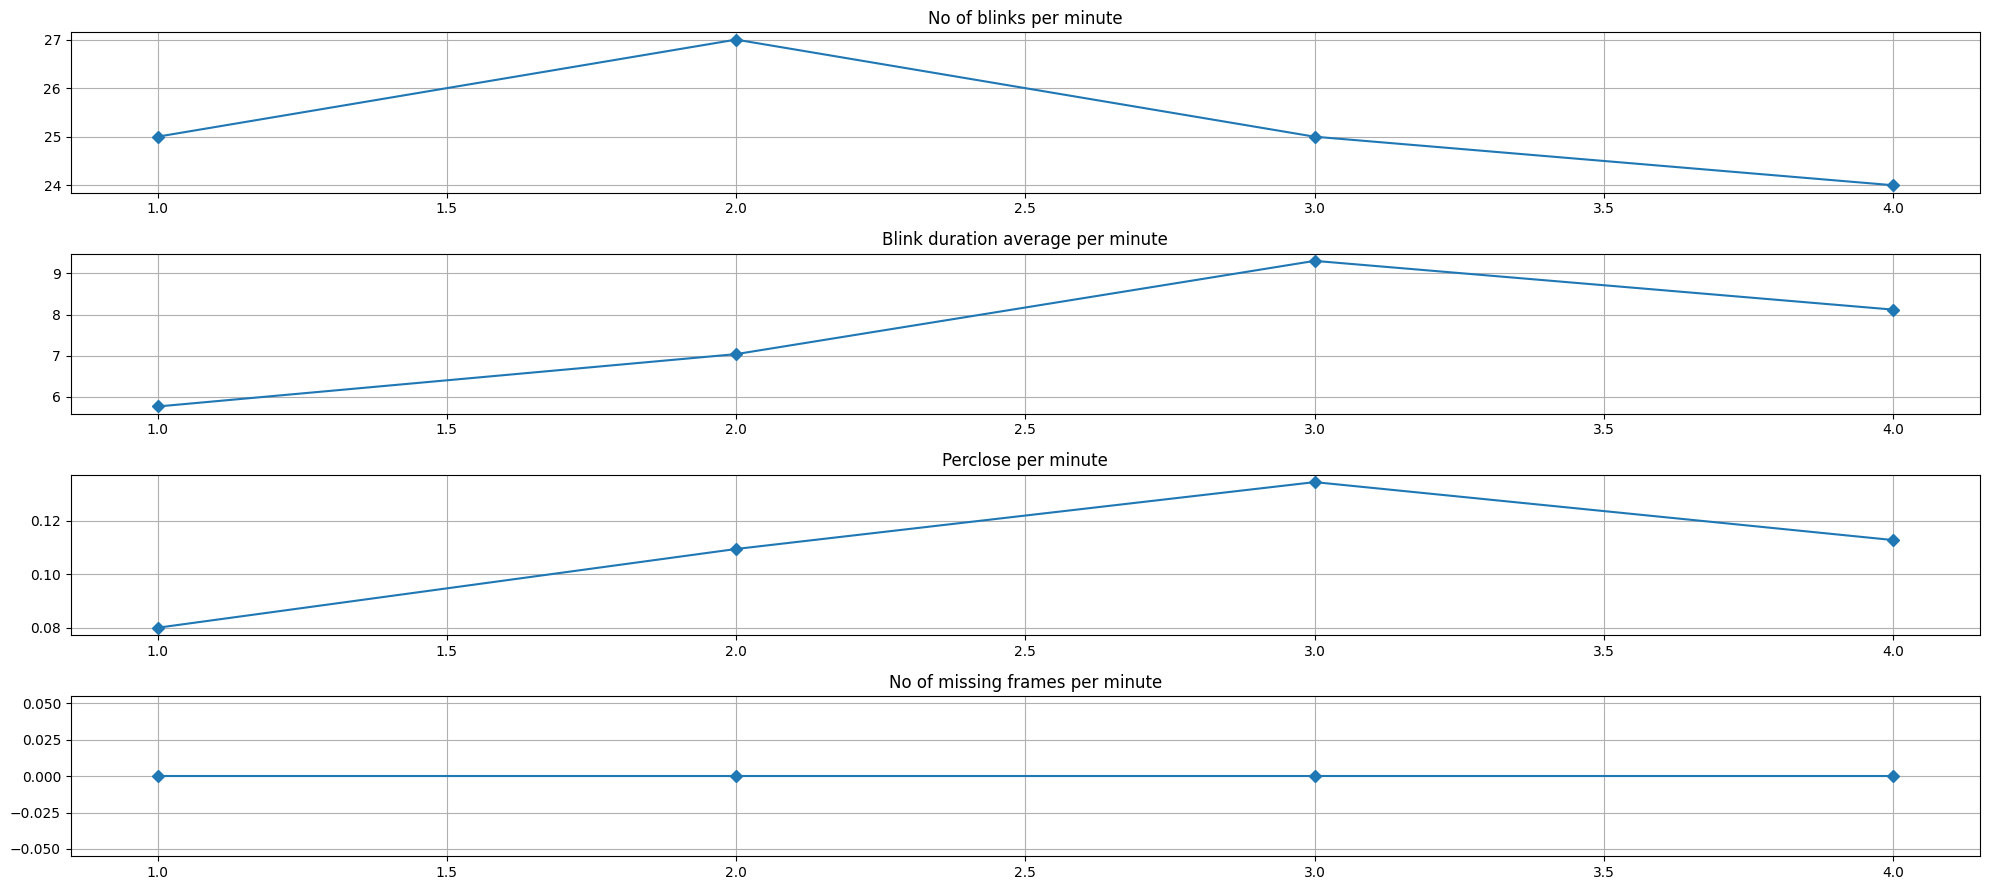

In [63]:
#graph ploting
minutes = range(1,len(blinks_per_minutes)+1)
two_minutes = [x for x in minutes if x % 2 == 0]
five_minutes = [x for x in minutes if x % 5 == 0]
# print(tow_minutes)
# print(len(blinks_per_two_minutes))
plt.subplot(4,1,1)
plt.plot(minutes,blinks_per_minutes, marker="D")
# plt.plot(minutes,np.mean(np.array(blinked_frame)))
plt.title("No of blinks per minute")
plt.grid()

plt.subplot(4,1,2)
plt.plot(minutes,average_duration_blink,marker="D")
plt.title("Blink duration average per minute")
plt.grid()

plt.subplot(4,1,3)
plt.plot(minutes,Perclose_per_minute,marker="D")
plt.title("Perclose per minute")
plt.grid()

plt.subplot(4,1,4)
plt.plot(minutes,missing_frames_per_minutes, marker="D")
plt.title("No of missing frames per minute")
plt.grid()

plt.tight_layout()
plt.show()




##### 3rd File

In [76]:
#main logic for indivisual file blink detection and blink duration
number_of_blinks = []
blink_duration = pd.DataFrame(columns=["Start_blink", "End_blink", "Blink_frame", "No_of_frames"])
df_alert = pd.read_csv(f"./Ashish_data/3_EAR.csv")
missing_frame_details = df_alert.copy()
# remove rows where facemesh could not detect the face
df_alert = df_alert.loc[(df_alert["EAR"] != 0)]
df_alert = df_alert.reset_index()  # reindexing to identify the blink duration
# after reset_index(), one additional column is added which does not required
df_alert.drop(columns=["index"], axis=1, inplace=True)
df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()  # exponetial weighted average moving a
startframe = list()
endframe = list()
frame_no = []
for i in range(df_alert.shape[0]):
    if df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-4]*0.85 and i > 4 and (df_alert["FN"].iloc[i] - df_alert["FN"].iloc[i-1]) < 2 and df_alert["EAR"].iloc[i]<0.14:
            if len(frame_no) == 0 or (df_alert["FN"].iloc[i] - frame_no[-1] > 8):
                frame_no.append(df_alert["FN"].iloc[i])
            else:
                if (df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-1]):
                    frame_no[-1] = df_alert["FN"].iloc[i]
number_of_blinks.append(len(frame_no))
print(frame_no)
print(number_of_blinks)
# file = df_alert.to_csv("Test.csv")


[36, 56, 146, 353, 483, 748, 845, 866, 1052, 1083, 1137, 1179, 1370, 1383, 1402, 1431, 1446, 1482, 1566, 1586, 1773, 1947, 2023, 2066, 2109, 2180, 2319, 2463, 2494, 2564, 2601, 2663, 2678, 2707, 2781, 2811, 2878, 3017, 3036, 3118, 3328, 3369, 3414, 3472, 3533, 3565, 3660, 3715, 3749, 3780, 3799, 3876, 3940, 3995, 4007, 4137, 4151, 4351, 4437, 4541, 4575, 4661, 4738, 4782, 4806, 4829, 4846, 4907, 4977, 5119, 5167, 5201, 5297, 5425, 5814, 5857, 5895, 5929, 5955, 6093, 6136, 6214, 6261, 6296, 6325, 6350, 6393, 6429, 6491, 6573, 6620, 6656, 6693, 6734, 6771, 6815, 6834, 6872, 6893, 7001, 7015, 7064, 7175, 7217, 7321, 7383, 7524, 7578, 7625, 7703, 7716, 7748, 7778, 7795, 7831, 7885, 7927, 8071, 8144, 8162, 8220, 8310, 8387, 8510, 8559, 8602, 8937, 9059, 9147, 9247, 9308, 9394, 9413, 9462, 9488, 9518, 9583, 9634, 9706, 9760, 9785, 9906, 9922, 10026, 10059, 10183, 10245, 10315, 10357, 10429, 10491, 10529, 10620, 10774, 10919, 10985, 11025, 11044, 11059, 11112, 11139, 11229, 11254, 11309, 1141

In [77]:
# Per minute information luke blink, duration and missing frame.
blinks_per_minutes = []
missing_frames_per_minutes = []
blinks_per_two_minutes = []
blinks_per_five_minutes = []
No_of_frame = 1800
count = 0
missing_frame_count = 0
increase = 1800
for x in frame_no:
    # start_b = data_blink["Start_blink"].loc[x]
    if (x < No_of_frame):
        count = count+1
    else:
        # print(count)
        blinks_per_minutes.append(count)
        No_of_frame = No_of_frame+increase
        count = 0

No_of_frame = 1800
increase = 1800
for i in range(missing_frame_details.shape[0]):
    # print(No_of_frame)
    if (i<No_of_frame):
        if(missing_frame_details["NewEAR"].iloc[i]==0):
            missing_frame_count = missing_frame_count+1
    else:
        # print(missing_frame_count)
        missing_frames_per_minutes.append(missing_frame_count)
        No_of_frame = No_of_frame+increase
        missing_frame_count = 0


print(blinks_per_minutes)
print(sum(missing_frames_per_minutes))

pd.set_option('display.max_rows', None)
print(sum(blinks_per_minutes)/(len(blinks_per_minutes)-1))


[21, 24, 26, 29, 23, 26, 21, 28, 24, 18, 18, 23, 29, 46, 34, 23, 32, 29, 30, 17, 23, 26, 40, 31, 31, 35, 26, 22, 21, 31, 32, 38, 31, 27]
335
28.333333333333332


In [78]:
#blink duration from the file
blink_duration_old_logic = pd.read_csv("./Blink_duration/3_Blink_Duration.csv")
no_of_frame = 1800
increasement = 1800
minute_blink = []
Perclose_per_minute = []
average_duration_blink = []
for i in range(blink_duration_old_logic.shape[0]):
    # print(i)
    if blink_duration_old_logic["Blink_frame"].iloc[i] < no_of_frame:
        minute_blink.append(blink_duration_old_logic["No_of_frames"].iloc[i])
    else:
        average_duration_blink.append(sum(minute_blink)/len(minute_blink))
        Perclose_per_minute.append((sum(minute_blink))/1800)
        minute_blink.clear()
        minute_blink.append(blink_duration_old_logic["No_of_frames"].iloc[i])
        no_of_frame = no_of_frame+increase
print(average_duration_blink)
print(Perclose_per_minute)


[9.666666666666666, 6.36, 7.296296296296297, 4.466666666666667, 4.375, 9.925925925925926, 7.5, 6.689655172413793, 7.88, 5.578947368421052, 6.0, 6.541666666666667, 6.766666666666667, 5.0638297872340425, 5.885714285714286, 12.833333333333334, 4.878787878787879, 5.4, 4.709677419354839, 15.944444444444445, 6.083333333333333, 5.518518518518518, 3.317073170731707, 4.4375, 3.9375, 7.25, 5.333333333333333, 6.043478260869565, 8.772727272727273, 7.3125, 5.515151515151516, 11.564102564102564, 11.15625, 6.392857142857143]
[0.11277777777777778, 0.08833333333333333, 0.10944444444444444, 0.07444444444444444, 0.058333333333333334, 0.14888888888888888, 0.09166666666666666, 0.10777777777777778, 0.10944444444444444, 0.058888888888888886, 0.06333333333333334, 0.08722222222222223, 0.11277777777777778, 0.1322222222222222, 0.11444444444444445, 0.1711111111111111, 0.08944444444444444, 0.09, 0.0811111111111111, 0.15944444444444444, 0.0811111111111111, 0.08277777777777778, 0.07555555555555556, 0.078888888888888

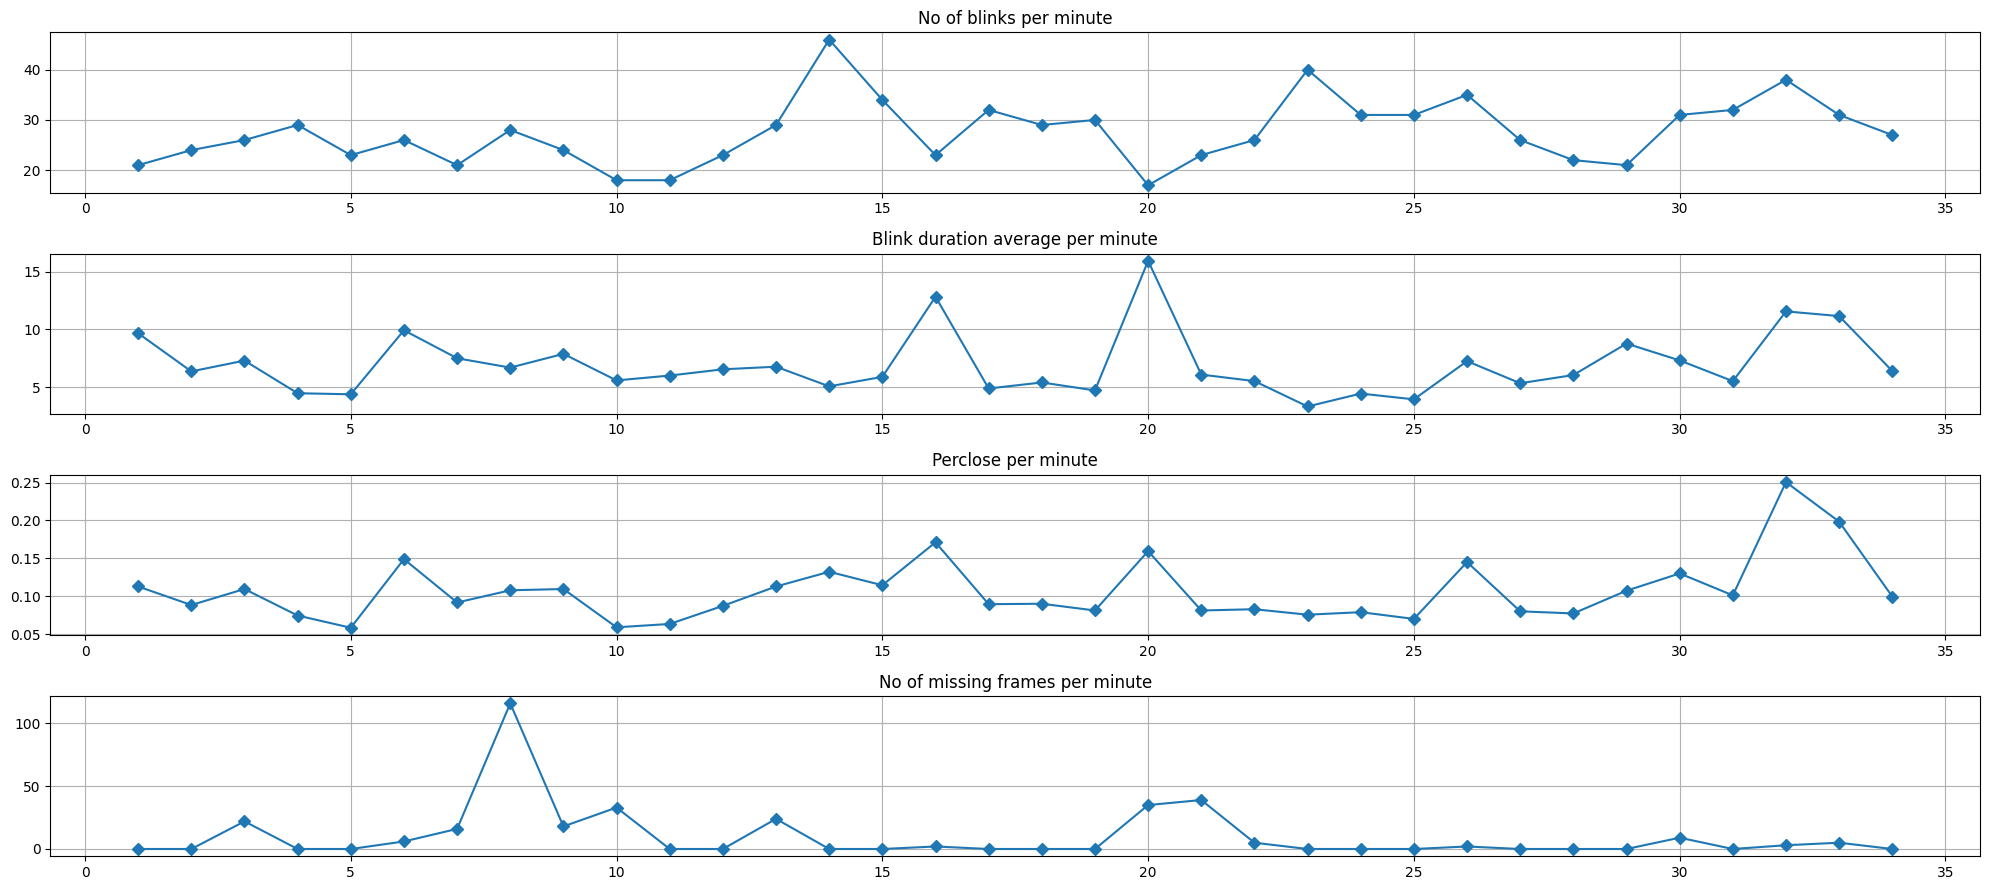

In [79]:
#graph ploting
minutes = range(1,len(blinks_per_minutes)+1)
two_minutes = [x for x in minutes if x % 2 == 0]
five_minutes = [x for x in minutes if x % 5 == 0]
# print(tow_minutes)
# print(len(blinks_per_two_minutes))
plt.subplot(4,1,1)
plt.plot(minutes,blinks_per_minutes, marker="D")
# plt.plot(minutes,np.mean(np.array(blinked_frame)))
plt.title("No of blinks per minute")
plt.grid()

plt.subplot(4,1,2)
plt.plot(minutes,average_duration_blink,marker="D")
plt.title("Blink duration average per minute")
plt.grid()

plt.subplot(4,1,3)
plt.plot(minutes,Perclose_per_minute,marker="D")
plt.title("Perclose per minute")
plt.grid()

plt.subplot(4,1,4)
plt.plot(minutes,missing_frames_per_minutes, marker="D")
plt.title("No of missing frames per minute")
plt.grid()

plt.tight_layout()
plt.show()




##### 4th File

In [80]:
#main logic for indivisual file blink detection and blink duration
number_of_blinks = []
blink_duration = pd.DataFrame(columns=["Start_blink", "End_blink", "Blink_frame", "No_of_frames"])
df_alert = pd.read_csv(f"./Ashish_data/4_EAR.csv")
missing_frame_details = df_alert.copy()
# remove rows where facemesh could not detect the face
df_alert = df_alert.loc[(df_alert["EAR"] != 0)]
df_alert = df_alert.reset_index()  # reindexing to identify the blink duration
# after reset_index(), one additional column is added which does not required
df_alert.drop(columns=["index"], axis=1, inplace=True)
df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()  # exponetial weighted average moving a
startframe = list()
endframe = list()
frame_no = []
for i in range(df_alert.shape[0]):
    if df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-4]*0.85 and i > 4 and (df_alert["FN"].iloc[i] - df_alert["FN"].iloc[i-1]) < 2 and df_alert["EAR"].iloc[i]<0.14:
            if len(frame_no) == 0 or (df_alert["FN"].iloc[i] - frame_no[-1] > 8):
                frame_no.append(df_alert["FN"].iloc[i])
            else:
                if (df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-1]):
                    frame_no[-1] = df_alert["FN"].iloc[i]
number_of_blinks.append(len(frame_no))
print(frame_no)
print(number_of_blinks)
# file = df_alert.to_csv("Test.csv")


[55, 99, 139, 188, 231, 305, 329, 394, 443, 479, 501, 588, 631, 641, 677, 729, 770, 826, 841, 870, 913, 953, 964, 987, 1008, 1042, 1081, 1133, 1208, 1300, 1323, 1367, 1391, 1403, 1414, 1431, 1516, 1532, 1557, 1581, 1612, 1729, 1776, 1907, 1973, 2019, 2029, 2081, 2146, 2204, 2214, 2273, 2322, 2495, 2555, 2666, 2720, 2744, 2769, 2800, 2821, 2855, 2880, 2897, 2924, 2990, 3011, 3023, 3192, 3225, 3269, 3337, 3375, 3509, 3650, 3717, 3774, 3784, 3828, 3848, 3922, 3978, 3988, 4043, 4101, 4140, 4191, 4240, 4280, 4294, 4339, 4369, 4425, 4460, 4491, 4527, 4570, 4599, 4619, 4634, 4656, 4705, 4732, 4766, 4810, 4903, 4924, 4970, 5079, 5132, 5213, 5304, 5351, 5376, 5433, 5460, 5522, 5557, 5602, 5689, 5774, 5786, 5904, 5944, 5999, 6018, 6028, 6067, 6100, 6119, 6129, 6164, 6373, 6511, 6557, 6828, 6864, 6884, 6904, 6932, 6951, 7022, 7062, 7232, 7260, 7301, 7359, 7401, 7449, 7475, 7488, 7568, 7665, 7692, 8048, 8096, 8127, 8158, 8204, 8222, 8303, 8350, 8394, 8445, 8492, 8533, 8636, 8666, 8750, 8787, 8894,

In [81]:
# Per minute information luke blink, duration and missing frame.
blinks_per_minutes = []
missing_frames_per_minutes = []
blinks_per_two_minutes = []
blinks_per_five_minutes = []
No_of_frame = 1800
count = 0
missing_frame_count = 0
increase = 1800
for x in frame_no:
    # start_b = data_blink["Start_blink"].loc[x]
    if (x < No_of_frame):
        count = count+1
    else:
        # print(count)
        blinks_per_minutes.append(count)
        No_of_frame = No_of_frame+increase
        count = 0
No_of_frame = 3600
increase = 3600
for x in frame_no:
    # start_b = data_blink["Start_blink"].loc[x]
    if (x < No_of_frame):
        count = count+1
    else:
        # print(count)
        blinks_per_two_minutes.append(count)
        No_of_frame = No_of_frame+increase
        count = 0

No_of_frame = 9000
increase = 9000
for x in frame_no:
    # start_b = data_blink["Start_blink"].loc[x]
    if (x < No_of_frame):
        count = count+1
    else:
        # print(count)
        blinks_per_five_minutes.append(count)
        No_of_frame = No_of_frame+increase
        count = 0

No_of_frame = 1800
increase = 1800
for i in range(missing_frame_details.shape[0]):
    # print(No_of_frame)
    if (i<No_of_frame):
        if(missing_frame_details["NewEAR"].iloc[i]==0):
            missing_frame_count = missing_frame_count+1
    else:
        # print(missing_frame_count)
        missing_frames_per_minutes.append(missing_frame_count)
        No_of_frame = No_of_frame+increase
        missing_frame_count = 0


print(blinks_per_minutes)
print(sum(missing_frames_per_minutes))

pd.set_option('display.max_rows', None)
print(sum(blinks_per_minutes)/(len(blinks_per_minutes)-1))


[43, 30, 39, 28, 28, 13, 15, 22, 19, 26, 31, 20, 30, 30, 32, 28, 29, 28, 29, 35, 39, 42, 26, 28, 19, 29, 21]
316
29.192307692307693


In [82]:
#blink duration from the file
blink_duration_old_logic = pd.read_csv("./Blink_duration/4_Blink_Duration.csv")
no_of_frame = 1800
increasement = 1800
minute_blink = []
Perclose_per_minute = []
average_duration_blink = []
for i in range(blink_duration_old_logic.shape[0]):
    # print(i)
    if blink_duration_old_logic["Blink_frame"].iloc[i] < no_of_frame:
        minute_blink.append(blink_duration_old_logic["No_of_frames"].iloc[i])
    else:
        average_duration_blink.append(sum(minute_blink)/len(minute_blink))
        Perclose_per_minute.append((sum(minute_blink))/1800)
        minute_blink.clear()
        minute_blink.append(blink_duration_old_logic["No_of_frames"].iloc[i])
        no_of_frame = no_of_frame+increase
print(average_duration_blink)
print(Perclose_per_minute)


[5.372093023255814, 10.838709677419354, 10.05, 10.517241379310345, 10.241379310344827, 12.5, 9.6875, 11.956521739130435, 11.0, 16.333333333333332, 7.78125, 9.761904761904763, 11.096774193548388, 8.870967741935484, 8.515151515151516, 6.586206896551724, 6.933333333333334, 12.10344827586207, 9.666666666666666, 10.11111111111111, 9.775, 5.72093023255814, 9.925925925925926, 5.103448275862069, 12.6, 6.2, 11.545454545454545]
[0.12833333333333333, 0.18666666666666668, 0.22333333333333333, 0.16944444444444445, 0.165, 0.09722222222222222, 0.08611111111111111, 0.1527777777777778, 0.12222222222222222, 0.245, 0.13833333333333334, 0.11388888888888889, 0.19111111111111112, 0.1527777777777778, 0.15611111111111112, 0.10611111111111111, 0.11555555555555555, 0.195, 0.16111111111111112, 0.20222222222222222, 0.21722222222222223, 0.13666666666666666, 0.14888888888888888, 0.08222222222222222, 0.14, 0.10333333333333333, 0.1411111111111111]


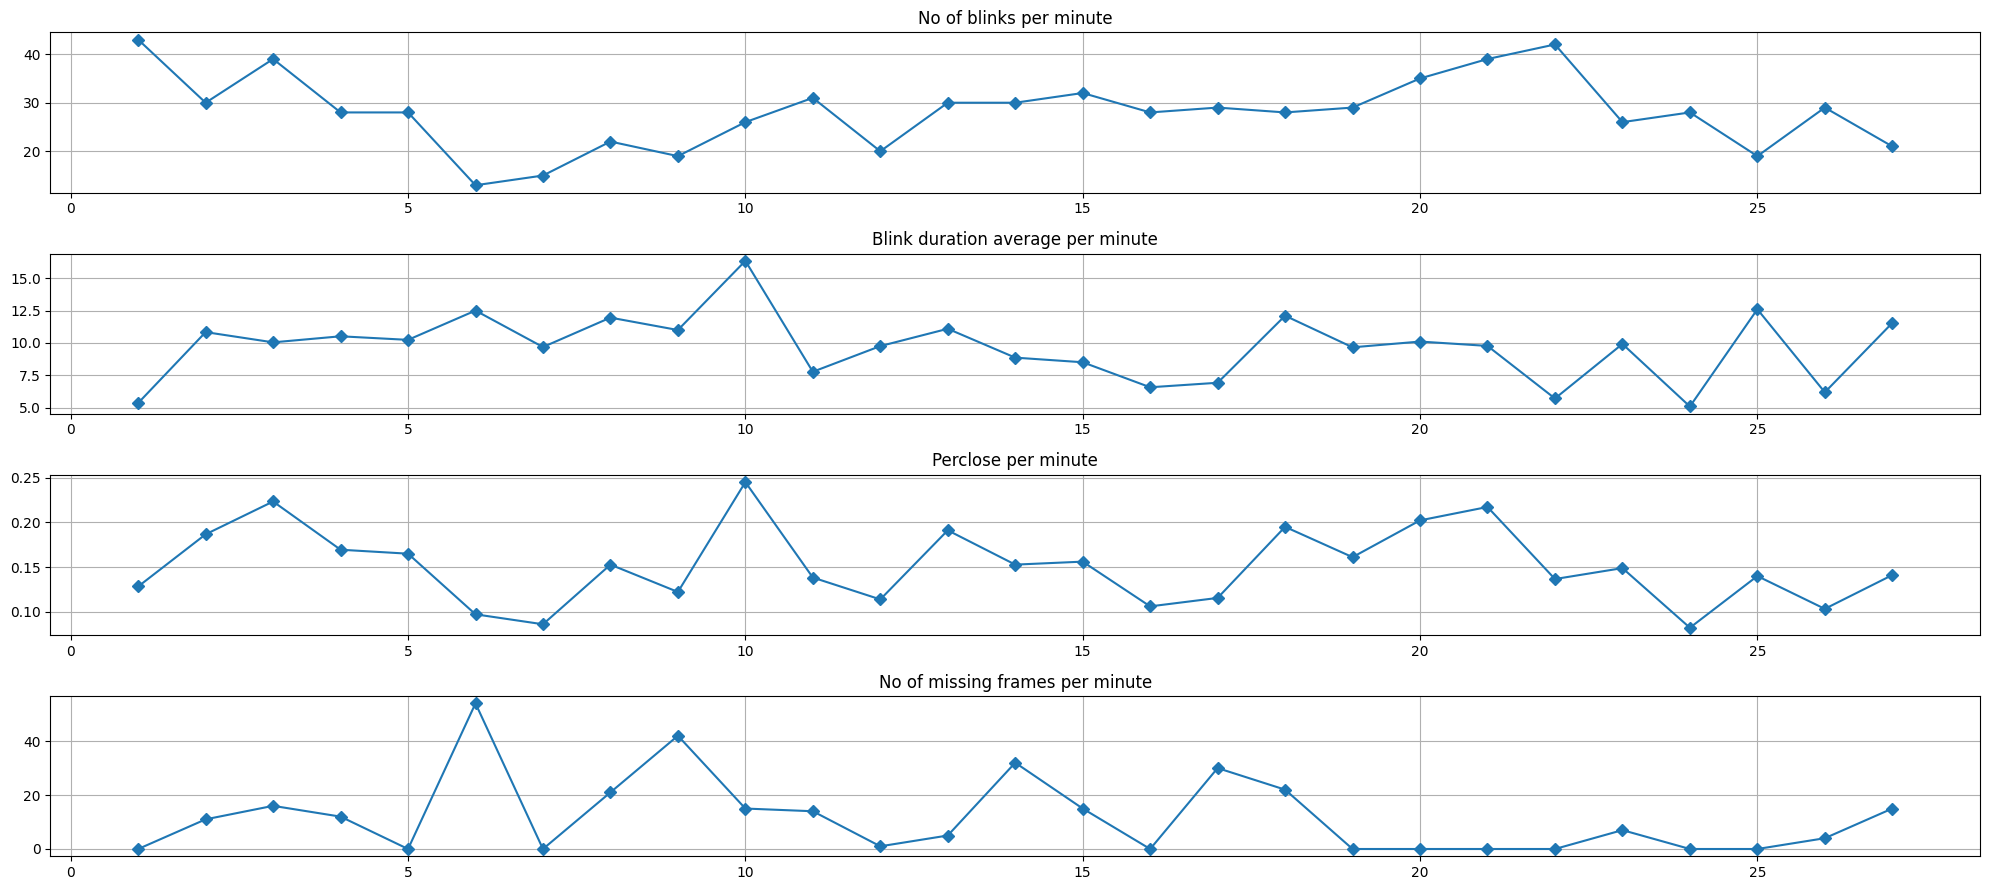

In [83]:
#graph ploting
minutes = range(1,len(blinks_per_minutes)+1)
two_minutes = [x for x in minutes if x % 2 == 0]
five_minutes = [x for x in minutes if x % 5 == 0]
# print(tow_minutes)
# print(len(blinks_per_two_minutes))
plt.subplot(4,1,1)
plt.plot(minutes,blinks_per_minutes, marker="D")
# plt.plot(minutes,np.mean(np.array(blinked_frame)))
plt.title("No of blinks per minute")
plt.grid()

plt.subplot(4,1,2)
plt.plot(minutes,average_duration_blink,marker="D")
plt.title("Blink duration average per minute")
plt.grid()

plt.subplot(4,1,3)
plt.plot(minutes,Perclose_per_minute,marker="D")
plt.title("Perclose per minute")
plt.grid()

plt.subplot(4,1,4)
plt.plot(minutes,missing_frames_per_minutes, marker="D")
plt.title("No of missing frames per minute")
plt.grid()

plt.tight_layout()
plt.show()




#### 5th file

In [95]:
#main logic for indivisual file blink detection and blink duration
number_of_blinks = []
blink_duration = pd.DataFrame(columns=["Start_blink", "End_blink", "Blink_frame", "No_of_frames"])
df_alert = pd.read_csv(f"./Ashish_data/5_EAR.csv")
missing_frame_details = df_alert.copy()
# remove rows where facemesh could not detect the face
df_alert = df_alert.loc[(df_alert["EAR"] != 0)]
df_alert = df_alert.reset_index()  # reindexing to identify the blink duration
# after reset_index(), one additional column is added which does not required
df_alert.drop(columns=["index"], axis=1, inplace=True)
df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()  # exponetial weighted average moving a
startframe = list()
endframe = list()
frame_no = []
for i in range(df_alert.shape[0]):
    if df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-4]*0.85 and i > 4 and (df_alert["FN"].iloc[i] - df_alert["FN"].iloc[i-1]) < 2 and df_alert["EAR"].iloc[i]<0.14:
            if len(frame_no) == 0 or (df_alert["FN"].iloc[i] - frame_no[-1] > 8):
                frame_no.append(df_alert["FN"].iloc[i])
            else:
                if (df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-1]):
                    frame_no[-1] = df_alert["FN"].iloc[i]
number_of_blinks.append(len(frame_no))
print(frame_no)
print(number_of_blinks)
# file = df_alert.to_csv("Test.csv")


[20, 96, 231, 275, 307, 344, 511, 572, 615, 655, 689, 785, 815, 863, 961, 986, 1061, 1071, 1113, 1155, 1252, 1267, 1325, 1398, 1421, 1439, 1477, 1514, 1528, 1593, 1654, 1694, 1716, 1728, 1772, 1815, 1846, 1873, 1907, 1958, 1975, 2048, 2119, 2166, 2216, 2258, 2333, 2388, 2440, 2496, 2554, 2613, 2726, 2770, 2816, 2834, 2857, 2913, 3013, 3052, 3115, 3186, 3254, 3286, 3310, 3328, 3365, 3414, 3493, 3556, 3593, 3625, 3651, 3683, 3692, 3722, 3748, 3777, 3805, 3869, 3887, 3915, 3951, 3990, 4041, 4068, 4091, 4182, 4244, 4274, 4373, 4441, 4502, 4545, 4642, 4713, 4765, 4794, 4838, 4872, 4990, 5043, 5053, 5103, 5163, 5275, 5326, 5410, 5459, 5524, 5608, 5641, 5716, 5766, 5826, 5898, 5912, 5926, 5970, 6036, 6068, 6096, 6112, 6128, 6171, 6203, 6264, 6293, 6336, 6346, 6415, 6463, 6498, 6547, 6588, 6656, 6706, 6736, 6770, 6825, 6857, 6900, 6954, 6989, 7038, 7069, 7101, 7138, 7182, 7211, 7265, 7505, 7535, 7600, 7656, 7682, 7753, 7788, 7835, 7907, 8034, 8102, 8163, 8189, 8229, 8277, 8430, 8472, 8530, 854

In [96]:
# Per minute information luke blink, duration and missing frame.
blinks_per_minutes = []
missing_frames_per_minutes = []
blinks_per_two_minutes = []
blinks_per_five_minutes = []
No_of_frame = 1800
count = 0
missing_frame_count = 0
increase = 1800
for x in frame_no:
    # start_b = data_blink["Start_blink"].loc[x]
    if (x < No_of_frame):
        count = count+1
    else:
        # print(x)
        blinks_per_minutes.append(count)
        No_of_frame = No_of_frame+increase
        # print(No_of_frame)
        count = 0

No_of_frame = 1800
increase = 1800
for i in range(missing_frame_details.shape[0]):
    # print(No_of_frame)
    if (i<No_of_frame):
        if(missing_frame_details["NewEAR"].iloc[i]==0):
            missing_frame_count = missing_frame_count+1
    else:
        # print(missing_frame_count)
        missing_frames_per_minutes.append(missing_frame_count)
        No_of_frame = No_of_frame+increase
        missing_frame_count = 0

if(len(blinks_per_minutes)<len(missing_frames_per_minutes)):
    blinks_per_minutes.append(0)
# print(len(blinks_per_minutes))
# print(len(missing_frames_per_minutes))

pd.set_option('display.max_rows', None)
print(sum(blinks_per_minutes)/(len(blinks_per_minutes)-1))


25.16


In [101]:
#blink duration from the file
blink_duration_old_logic = pd.read_csv("./Blink_duration/5_Blink_Duration.csv")
no_of_frame = 1800
increasement = 1800
minute_blink = []
Perclose_per_minute = []
average_duration_blink = []
for i in range(blink_duration_old_logic.shape[0]):
    # print(i)
    if blink_duration_old_logic["Blink_frame"].iloc[i] < no_of_frame:
        minute_blink.append(blink_duration_old_logic["No_of_frames"].iloc[i])
    else:
        average_duration_blink.append(sum(minute_blink)/len(minute_blink))
        Perclose_per_minute.append((sum(minute_blink))/1800)
        minute_blink.clear()
        minute_blink.append(blink_duration_old_logic["No_of_frames"].iloc[i])
        no_of_frame = no_of_frame+increase
print(average_duration_blink)
print(Perclose_per_minute)

if(len(average_duration_blink)<len(missing_frames_per_minutes)):
    average_duration_blink.append(0)

if(len(Perclose_per_minute)<len(missing_frames_per_minutes)):
    Perclose_per_minute.append(0)


[9.571428571428571, 5.083333333333333, 7.166666666666667, 5.809523809523809, 6.103448275862069, 6.888888888888889, 12.666666666666666, 6.2631578947368425, 6.0, 5.233333333333333, 4.55, 7.913043478260869, 5.72, 6.04, 5.653846153846154, 5.416666666666667, 9.473684210526315, 14.73076923076923, 5.483870967741935, 5.45, 4.37037037037037, 8.733333333333333, 6.75, 10.925925925925926, 7.764705882352941, 8.172413793103448, 5.44, 6.333333333333333, 4.935483870967742, 5.387096774193548, 10.647058823529411, 10.25, 5.972972972972973, 4.769230769230769, 5.085714285714285, 5.0, 15.19047619047619, 4.28, 7.533333333333333, 8.038461538461538, 11.291666666666666, 18.4375, 10.523809523809524, 8.416666666666666, 6.482758620689655, 12.956521739130435, 5.2592592592592595, 8.307692307692308, 16.185185185185187, 15.826086956521738]
[0.18611111111111112, 0.10166666666666667, 0.14333333333333334, 0.13555555555555557, 0.09833333333333333, 0.10333333333333333, 0.10555555555555556, 0.0661111111111111, 0.09, 0.08722

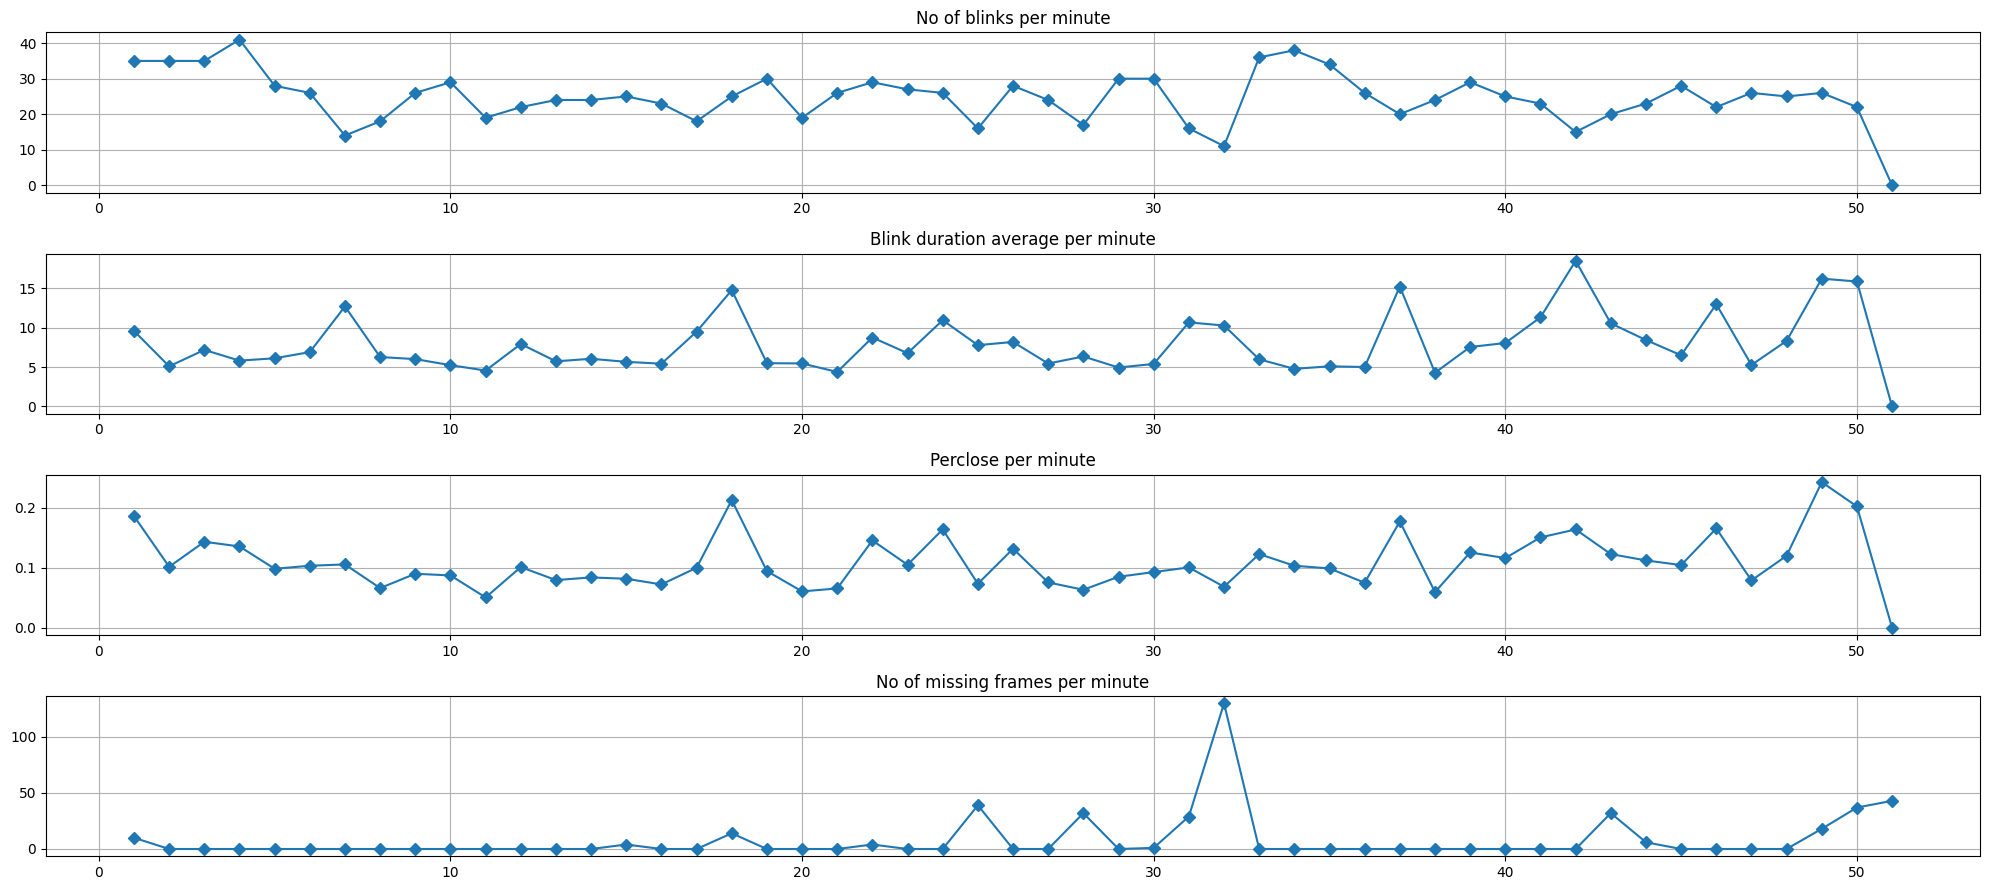

In [102]:
#graph ploting
minutes = range(1,len(blinks_per_minutes)+1)
two_minutes = [x for x in minutes if x % 2 == 0]
five_minutes = [x for x in minutes if x % 5 == 0]
# print(tow_minutes)
# print(len(blinks_per_two_minutes))
plt.subplot(4,1,1)
plt.plot(minutes,blinks_per_minutes, marker="D")
# plt.plot(minutes,np.mean(np.array(blinked_frame)))
plt.title("No of blinks per minute")
plt.grid()

plt.subplot(4,1,2)
plt.plot(minutes,average_duration_blink,marker="D")
plt.title("Blink duration average per minute")
plt.grid()

plt.subplot(4,1,3)
plt.plot(minutes,Perclose_per_minute,marker="D")
plt.title("Perclose per minute")
plt.grid()

plt.subplot(4,1,4)
plt.plot(minutes,missing_frames_per_minutes, marker="D")
plt.title("No of missing frames per minute")
plt.grid()

plt.tight_layout()
plt.show()

In [4]:
Day1_driver1 = pd.concat(map(pd.read_csv,['./Ashish_data/1_EAR.csv','./Ashish_data/2_EAR.csv','./Ashish_data/3_EAR.csv','./Ashish_data/4_EAR.csv','./Ashish_data/5_EAR.csv','./Ashish_data/6_EAR.csv']))
Day1_driver2 = pd.concat(map(pd.read_csv,['./Ashish_data/7_EAR.csv','./Ashish_data/8_EAR.csv','./Ashish_data/9_EAR.csv']))
Day2_driver2_1 = pd.concat(map(pd.read_csv,['./Ashish_data/10_EAR.csv','./Ashish_data/11_EAR.csv']))
Day2_driver1_1 = pd.concat(map(pd.read_csv,['./Ashish_data/12_EAR.csv','./Ashish_data/13_EAR.csv']))
Day2_driver2_2 = pd.concat(map(pd.read_csv,['./Ashish_data/14_EAR.csv','./Ashish_data/Samsung/1_EAR.csv','./Ashish_data/Samsung/2_EAR.csv','./Ashish_data/Samsung/3_EAR.csv','./Ashish_data/Samsung/4_EAR.csv']))
Day2_driver1_2 = pd.concat(map(pd.read_csv,['./Ashish_data/15_EAR.csv','./Ashish_data/16_EAR.csv','./Ashish_data/17_EAR.csv']))
Day3_driver2_1 = pd.concat(map(pd.read_csv,['./Ashish_data/Samsung/6_EAR.csv','./Ashish_data/Samsung/7_EAR.csv','./Ashish_data/Samsung/8_EAR.csv','./Ashish_data/Samsung/9_EAR.csv','./Ashish_data/Samsung/10_EAR.csv','./Ashish_data/Samsung/11_EAR.csv']))
Day3_driver1_1 = pd.concat(map(pd.read_csv,['./Ashish_data/Samsung/5_EAR.csv']))
Day3_driver2_2 = pd.concat(map(pd.read_csv,['./Ashish_data/23_EAR.csv','./Ashish_data/24_EAR.csv','./Ashish_data/25_EAR.csv']))
Day3_driver1_2 = pd.concat(map(pd.read_csv,['./Ashish_data/18_EAR.csv','./Ashish_data/19_EAR.csv','./Ashish_data/20_EAR.csv','./Ashish_data/21_EAR.csv','./Ashish_data/22_EAR.csv']))
Day3_driver1_3 = pd.concat(map(pd.read_csv,['./Ashish_data/26_EAR.csv']))

In [5]:
Day1_driver1.reset_index(inplace=True)
Day1_driver2.reset_index(inplace=True)
Day2_driver2_1.reset_index(inplace=True)
Day2_driver1_1.reset_index(inplace=True)
Day2_driver2_2.reset_index(inplace=True)
Day2_driver1_2.reset_index(inplace=True)
Day3_driver2_1.reset_index(inplace=True)
Day3_driver1_1.reset_index(inplace=True)
Day3_driver2_2.reset_index(inplace=True)
Day3_driver1_2.reset_index(inplace=True)
Day3_driver1_3.reset_index(inplace=True)


In [8]:
Day1_driver1.to_csv('Day1_driver1.csv')
Day1_driver2.to_csv('Day1_driver2.csv')
Day2_driver2_1.to_csv('Day2_driver2_1.csv')
Day2_driver1_1.to_csv('Day2_driver1_1.csv')
Day2_driver2_2.to_csv('Day2_driver2_2.csv')
Day2_driver1_2.to_csv('Day2_driver1_2.csv')
Day3_driver2_1.to_csv('Day3_driver2_1.csv')
Day3_driver1_1.to_csv('Day3_driver1_1.csv')
Day3_driver2_2.to_csv('Day3_driver2_2.csv')
Day3_driver1_2.to_csv('Day3_driver1_2.csv')
Day3_driver1_3.to_csv('Day3_driver1_3.csv')

In [57]:
csvfiles = ['Day1_driver1.csv','Day1_driver2.csv','Day2_driver2_1.csv','Day2_driver1_1.csv','Day2_driver2_2.csv','Day2_driver1_2.csv','Day3_driver2_1.csv','Day3_driver1_1.csv','Day3_driver2_2.csv','Day3_driver1_2.csv','Day3_driver1_3.csv']
# csvfiles = ['01_10_EAR.csv']
number_of_blinks = []
blink_duration = pd.DataFrame(columns=["Start_blink", "End_blink", "Blink_frame", "No_of_frames"])
perclos_value = list()
for x in csvfiles:
    df_alert = pd.read_csv(x)
    # df_alert.drop(df_alert.columns[[1,2]],axis=1,inplace=True)
    # df_alert.rename(columns={"level_0":"FN"}, inplace=True)
    # remove rows where facemesh could not detect the face
    df_alert = df_alert.loc[(df_alert["EAR"] != 0)]
    df_alert = df_alert.reset_index()  # reindexing to identify the blink duration
    # after reset_index(), one additional column is added which does not required
    df_alert.drop(columns=["index"], axis=1, inplace=True)
    df_alert.drop(df_alert.columns[[1,2]],axis=1,inplace=True)
    df_alert.rename(columns={"level_0":"FN"}, inplace=True)
    print(df_alert.columns)
    df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()  # exponetial weighted average moving a
    startframe = list()
    endframe = list()
    frame_no = []
    print(x)
    for i in range(df_alert.shape[0]):
        if df_alert["NewEAR"].iloc[i] < df_alert["NewEAR"].iloc[i-4]*0.68 and i > 4 and (df_alert["FN"].iloc[i] - df_alert["FN"].iloc[i-1]) < 2 and df_alert["NewEAR"].iloc[i]<0.11:
            if len(frame_no) == 0 or (df_alert["FN"].iloc[i] - frame_no[-1] > 8):
                frame_no.append(df_alert["FN"].iloc[i])
            else:
                if (df_alert["NewEAR"].iloc[i] < df_alert["NewEAR"].iloc[i-1]):
                    frame_no[-1] = df_alert["FN"].iloc[i]
    number_of_blinks.append(len(frame_no))
    # print(frame_no)
    for i in range(len(frame_no)):
        start_frame, end_frame, blinked_frame = 0, 0, 0
        blinked_frame = frame_no[i]
        earemv = df_alert["NewEAR"].loc[df_alert["FN"]== blinked_frame].iloc[0]
        # print(i)
        if i == 0:
            sf = 0
        else:
            # print("end_blink",blink_duration["End_blink"].iloc[i-1])
            sf = df_alert.index[df_alert["FN"] == blink_duration["End_blink"].iloc[i-1]][0]
        # 
        if i == len(frame_no)-1:
            en = df_alert.shape[0]
        else:
            en = df_alert.index[df_alert["FN"] == frame_no[i+1]][0]
        # print(sf)
        # print("start {} and end frame {}".format(sf,en))
        
        for j in range(df_alert.index[df_alert["FN"] == frame_no[i]][0], sf, -1):
        # print(j)
            if (df_alert["NewEAR"].iloc[j] < (earemv/0.84)) and df_alert["NewEAR"].iloc[j] < 0.1:
                start_frame = df_alert["FN"].iloc[j]
                continue
            else:
                start_frame = df_alert["FN"].iloc[j]
            # print("start frame",start_frame)
                break
        # print("threshold",(earemv/0.92))
        # print("------------")
        for j in range(df_alert.index[df_alert["FN"] == frame_no[i]][0], en):
        # print(df_alert["NewEMA"].iloc[j])
            if ((df_alert["NewEAR"].iloc[j]) > (earemv/0.84)) and (df_alert["NewEAR"].iloc[j] > 0.1):
                end_frame = df_alert["FN"].iloc[j]
                break
            else:
                end_frame = df_alert["FN"].iloc[j]
                continue
            
        # print(start_frame)
        blink_duration.loc[blink_duration.shape[0]] = [start_frame, end_frame, blinked_frame, (end_frame-start_frame)]
    file = blink_duration.to_csv(x.split(".")[0]+"_Blink_Duration.csv")
    frame_no.clear()
    blink_duration = blink_duration.drop(blink_duration.index[0:])


print(number_of_blinks)
# file = df_alert.to_csv("Test.csv")


Index(['FN', 'EAR_L', 'EAR_R', 'EAR', 'EAR_Diff', 'NewEAR'], dtype='object')
Day1_driver1.csv
Index(['FN', 'EAR_L', 'EAR_R', 'EAR', 'EAR_Diff', 'NewEAR'], dtype='object')
Day1_driver2.csv
Index(['FN', 'EAR_L', 'EAR_R', 'EAR', 'EAR_Diff', 'NewEAR'], dtype='object')
Day2_driver2_1.csv
Index(['FN', 'EAR_L', 'EAR_R', 'EAR', 'EAR_Diff', 'NewEAR'], dtype='object')
Day2_driver1_1.csv
Index(['FN', 'EAR_L', 'EAR_R', 'EAR', 'EAR_Diff', 'NewEAR'], dtype='object')
Day2_driver2_2.csv
Index(['FN', 'EAR_L', 'EAR_R', 'EAR', 'EAR_Diff', 'NewEAR'], dtype='object')
Day2_driver1_2.csv
Index(['FN', 'EAR_L', 'EAR_R', 'EAR', 'EAR_Diff', 'NewEAR'], dtype='object')
Day3_driver2_1.csv
Index(['FN', 'EAR_L', 'EAR_R', 'EAR', 'EAR_Diff', 'NewEAR'], dtype='object')
Day3_driver1_1.csv
Index(['FN', 'EAR_L', 'EAR_R', 'EAR', 'EAR_Diff', 'NewEAR'], dtype='object')
Day3_driver2_2.csv
Index(['FN', 'EAR_L', 'EAR_R', 'EAR', 'EAR_Diff', 'NewEAR'], dtype='object')
Day3_driver1_2.csv
Index(['FN', 'EAR_L', 'EAR_R', 'EAR', 'EAR_D

In [54]:
missing_frame_details = pd.read_csv("Day3_driver2_2.csv")
df_day1_1 = pd.read_csv("Day3_driver2_2_Blink_Duration.csv")
# Per minute information like blink, duration and missing frame.
blinks_per_minutes = []
missing_frames_per_minutes = []
No_of_frame = 1800
count = 0
missing_frame_count = 0
increase = 1800
for i in range(df_day1_1.shape[0]):
    # start_b = data_blink["Start_blink"].loc[x]
    x = df_day1_1['Blink_frame'].iloc[i]
    if (x < No_of_frame):
        count = count+1
    else:
        # print(x)
        blinks_per_minutes.append(count)
        No_of_frame = No_of_frame+increase
        # print(No_of_frame)
        count = 0

No_of_frame = 1800
increase = 1800
print(missing_frame_details.shape[0])
for i in range(missing_frame_details.shape[0]):
    # print(No_of_frame)
    if (i<No_of_frame):
        if(missing_frame_details["NewEAR"].iloc[i]==0):
            missing_frame_count = missing_frame_count+1
    else:
        # print(missing_frame_count)
        missing_frames_per_minutes.append(missing_frame_count)
        No_of_frame = No_of_frame+increase
        missing_frame_count = 0

if(len(blinks_per_minutes)<len(missing_frames_per_minutes)):
    blinks_per_minutes.append(0)
print(len(blinks_per_minutes))
print(len(missing_frames_per_minutes))

pd.set_option('display.max_rows', None)
# print(sum(blinks_per_minutes)/(len(blinks_per_minutes)-1))


103426
57
57


In [55]:
no_of_frame = 1800
increasement = 1800
minute_blink = []
Perclose_per_minute = []
average_duration_blink = []
for i in range(df_day1_1.shape[0]):
    # print(i)
    if df_day1_1["Blink_frame"].iloc[i] < no_of_frame:
        minute_blink.append(df_day1_1["No_of_frames"].iloc[i])
    else:
        average_duration_blink.append(sum(minute_blink)/len(minute_blink))
        Perclose_per_minute.append((sum(minute_blink))/1800)
        minute_blink.clear()
        minute_blink.append(df_day1_1["No_of_frames"].iloc[i])
        no_of_frame = no_of_frame+increase
print(len(average_duration_blink))
print(len(Perclose_per_minute))

if(len(average_duration_blink)<len(missing_frames_per_minutes)):
    average_duration_blink.append(0)

if(len(Perclose_per_minute)<len(missing_frames_per_minutes)):
    Perclose_per_minute.append(0)

57
57


In [56]:
# print(blinks_per_minutes)
# print(missing_frames_per_minutes)
# print(average_duration_blink)
print(len(Perclose_per_minute))
print(len(minutes))
minutes = range(1,len(blinks_per_minutes)+1)
final_data_frame_157m = pd.DataFrame(list(zip(minutes,blinks_per_minutes,average_duration_blink,Perclose_per_minute,missing_frames_per_minutes)), columns = ["Minutes","Blink_per min","Avg_Blink_duration","Perclose_per_minute","Missing frame"])
final_data_frame_157m.to_csv("Final_output.csv")

57
73


ValueError: x and y must have same first dimension, but have shapes (70,) and (79,)

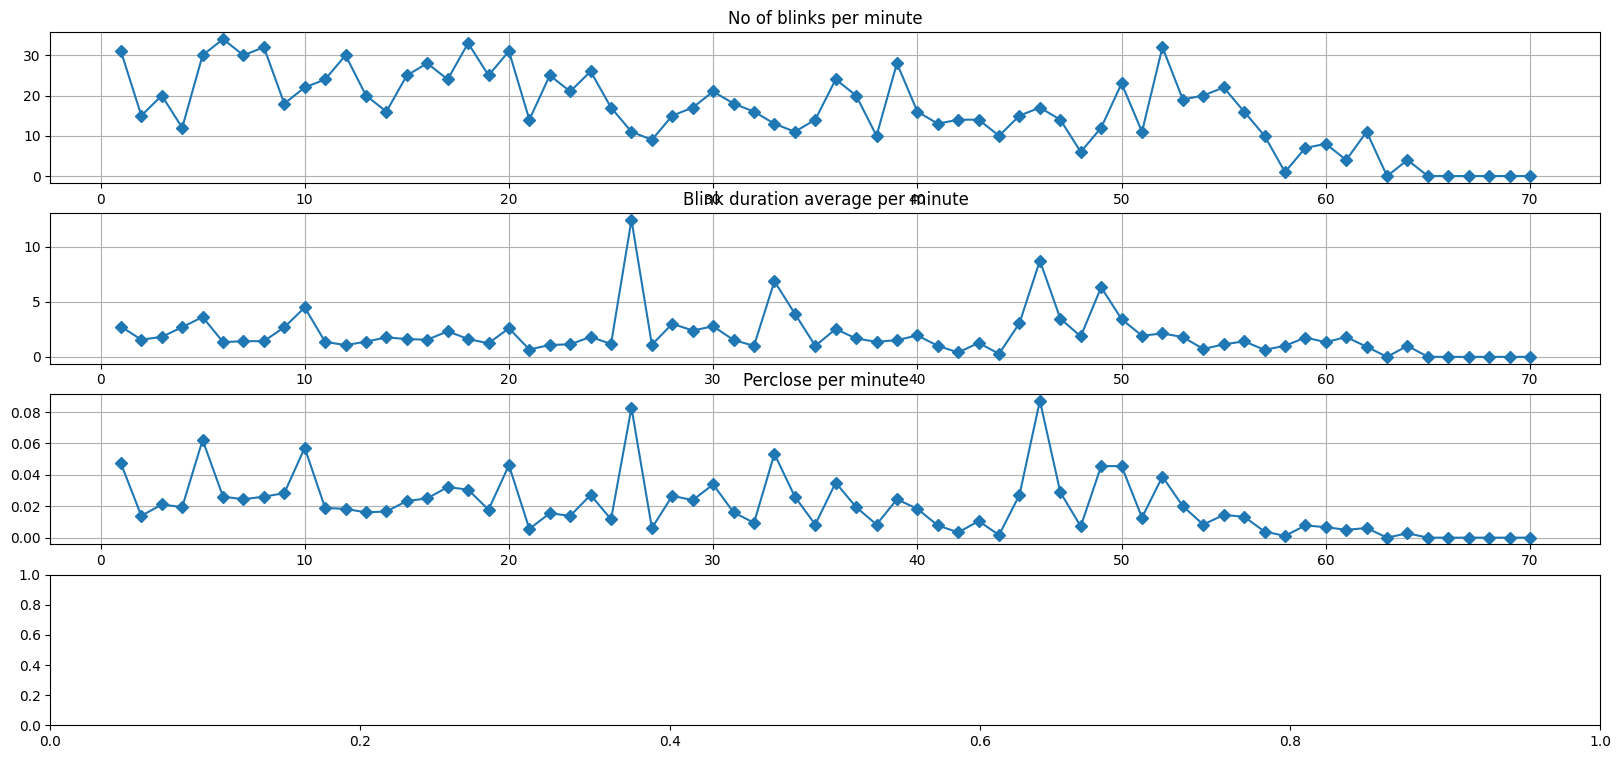

In [20]:
#graph ploting
minutes1 = range(1,((missing_frame_details.shape[0])//1800))
minutes = range(1,len(blinks_per_minutes)+1)
two_minutes = [x for x in minutes if x % 2 == 0]
five_minutes = [x for x in minutes if x % 5 == 0]
# print(tow_minutes)
# print(len(blinks_per_two_minutes))
plt.subplot(4,1,1)
plt.plot(minutes,blinks_per_minutes, marker="D")
# plt.plot(minutes,np.mean(np.array(blinked_frame)))
plt.title("No of blinks per minute")
plt.grid()

plt.subplot(4,1,2)
plt.plot(minutes,average_duration_blink,marker="D")
plt.title("Blink duration average per minute")
plt.grid()

plt.subplot(4,1,3)
plt.plot(minutes,Perclose_per_minute,marker="D")
plt.title("Perclose per minute")
plt.grid()

plt.subplot(4,1,4)
plt.plot(minutes,missing_frames_per_minutes, marker="D")
plt.title("No of missing frames per minute")
plt.grid()

plt.tight_layout()
plt.show()

In [65]:
#final code for blink count per minute,average blink duration, perclose index values


Full_data = pd.read_csv("Day3_driver2_2.csv")
data_analytics = pd.read_csv("Day3_driver2_2_Blink_Duration.csv")
# Per minute information like blink, duration and missing frame.
blinks_per_minutes = []
missing_frames_per_minutes = []
blink_avg_duration_per_minute = []
blink_duraration_per_minute = []
perclose_per_minute = []
start = 0
end = 1800
# No_of_frame = 1800
count = 0
shift = 0
blink_count = 0
missing_frame_count = 0
increase = 1800
# print((Full_data["EAR"] == 0).sum())
for i in range(Full_data.shape[0]):
    if i<end:
        if Full_data["EAR"].iloc[i]==0:
            count = count+1
        if i == data_analytics["Blink_frame"].iloc[shift]:
            blink_count = blink_count+1
            blink_duraration_per_minute.append(data_analytics["No_of_frames"].iloc[shift])
            if shift<data_analytics.shape[0]-1:
                shift = shift+1 
            # print("value of i: {} and blink_count : {}".format(data_analytics["Blink_frame"].iloc[shift], shift))  
    else:
        missing_frames_per_minutes.append(count)
        blinks_per_minutes.append(blink_count)
        blink_avg_duration_per_minute.append(sum(blink_duraration_per_minute)/len(blink_duraration_per_minute))
        perclose_per_minute.append(sum(blink_avg_duration_per_minute)/1800)
        count=0
        blink_count = 0
        start = i
        end = (i -1) + 1800
        blink_duraration_per_minute.clear()

missing_frames_per_minutes.append(count)
blinks_per_minutes.append(blink_count)
blink_avg_duration_per_minute.append(sum(blink_duraration_per_minute)/len(blink_duraration_per_minute))
perclose_per_minute.append(sum(blink_avg_duration_per_minute)/1800)
print(len(missing_frames_per_minutes))
print(sum(blinks_per_minutes))
print(len(blink_avg_duration_per_minute))
print(len(perclose_per_minute))  

pd.set_option('display.max_rows', None)
# print(sum(blinks_per_minutes)/(len(blinks_per_minutes)-1))


58
750
58
58


In [11]:
data = pd.read_csv("drive_data_with_lable.csv")
data.drop(data.columns[[0,1,2,3]],axis=1,inplace=True)

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], random_state=42,test_size=0.1,shuffle=True)
clr = AdaBoostClassifier(n_estimators=100)
clr.fit(X_train,Y_train)
out = clr.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(out, Y_test)

array([[25218,    71],
       [   22,  2759]])